** Read stuff from your own gdrive**

In [0]:
!pip install torch<=1.2.0
!pip install torchtext==0.4
%matplotlib inline

/bin/bash: =1.2.0: No such file or directory
     |████████████████████████████████| 61kB 2.8MB/s 
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


In [0]:
!pip install PyDrive



In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [2]:

# Import the corpus data

from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Constants

In [3]:
MY_HOME = "My Drive/nlp"
stop_words = [
        "a", "about", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along",
        "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
        "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be",
        "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
        "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "co",
        "con", "could", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight",
        "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
        "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill", "find", "fire", "first", "five", "for",
        "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had",
        "has", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself",
        "him", "himself", "his", "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed", "interest",
        "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made",
        "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much",
        "must", "my", "myself", "name", "namely", "neither", "nevertheless", "next", "nine", "nobody", "now", "nowhere",
        "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours",
        "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see",
        "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some",
        "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take",
        "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby",
        "therefore", "therein", "thereupon", "these", "they", "thick", "thin", "third", "this", "those", "though",
        "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve",
        "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what",
        "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon",
        "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will",
        "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves"
        ]

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
def _tokenize_stem_lem_join(text):
    """Stem and lemmatize text by tokenizing and joining back together"""
    words = nltk.word_tokenize(text)
    words = _stem_words(words)
    words = _lemmatize_verbs(words)
    return ' '.join(words)
    

def _stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems


def _lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

stop_words_preproc = []
for word in stop_words:
    temp = _tokenize_stem_lem_join(word)
    stop_words_preproc.append(temp)

print(stop_words_preproc[0:10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['a', 'about', 'abov', 'across', 'aft', 'afterward', 'again', 'against', 'al', 'almost']


In [0]:
import random
def split_train_test(df, train=0.60):
    train_size = round(len(df) * train)
    train_indices = random.sample(population=df.index.tolist(), k=train_size)
    train_df = df.loc[train_indices]
    test_df = df.loc[set(df.index) - set(train_df.index)] #get rest of index
    return train_df, test_df


In [57]:
import numpy as np
def one_hot(a, num_classes):
  a = np.array([a])
  return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

print(one_hot([[1], [0]], 2))

[[0. 1.]
 [1. 0.]]


In [0]:
from sklearn.neural_network import MLPClassifier
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import confusion_matrix
import pickle
from sklearn.metrics import classification_report

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics.pairwise import cosine_similarity


seed = 123
np.random.seed(seed)

def to_tdidf(_lim_unigram=500):
    """
    prepare utils for torch dataset
    """
    print("======> create util vectorizers and some mapping for torch dataset")
    data = pd.read_pickle(os.path.join("drive/My Drive/nlp", "preprocessed_claim_body.pkl"))
    id_ref = {}

    
    print(data.head())
    lim_unigram = _lim_unigram
    # no more ram, limit this
    # TODO: change to training set, not a simple slicing
    # Create reference dictionary
    for i, elem in enumerate(data['claim'] + data['body']):
        id_ref[elem] = i
    bow_vectorizer = CountVectorizer(max_features=lim_unigram, stop_words=stop_words_preproc)\
                  .fit(data['claim'][0:90] + data['body'][0:90])
    bow = bow_vectorizer.transform(data['claim'][0:90] + data['body'][0:90])
    tfreq_vectorizer = TfidfTransformer(use_idf=False).fit(bow)
    tfreq = tfreq_vectorizer.transform(bow).toarray()

    tfidf_vectorizer = TfidfVectorizer(max_features=lim_unigram, stop_words=stop_words_preproc).\
        fit(data['claim'] + data['body'])  # Train and test sets
  
    return id_ref, bow, tfreq, tfidf_vectorizer




In [0]:

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(64+64+1, 100)
        self.fc2 = nn.Linear(100, 3)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(x)
        return x


In [0]:
from torch.utils.data import Dataset, DataLoader
import torch
from sklearn.decomposition import PCA

class ClaimBodyDataset(Dataset):
    """claim body dataset for training"""
    # TODO: check using loading the dataframe directly
    def __init__(self, df, _lim_unigram=500):
        """
        Args:
            df is the dataframe, sliced either train or test, still has the two columns!
            claim: 5000 by 1
            body: 5000 by 1
            cosine_similarity: 1 by 1
        """
        self.df = df #pd.read_pickle(df)
        self.lim_unigram = _lim_unigram
        self.bow_vectorizer_claim = CountVectorizer(max_features=self.lim_unigram, stop_words=stop_words_preproc)
        self.bow_vectorizer_body = CountVectorizer(max_features=self.lim_unigram, stop_words=stop_words_preproc)

        self.bow_claim = self.bow_vectorizer_claim.fit_transform(self.df['claim'])
        self.bow_body = self.bow_vectorizer_body.fit_transform(self.df['body'])
        

        self.tfreq_vectorizer_claim = TfidfTransformer(use_idf=False).fit(self.bow_claim)
        self.tfreq_vectorizer_body = TfidfTransformer(use_idf=False).fit(self.bow_body)


        self.tfreq_claim = self.tfreq_vectorizer_claim.transform(self.bow_claim).toarray()
        self.tfreq_body = self.tfreq_vectorizer_body.transform(self.bow_body).toarray()

        pca = PCA(n_components=64)
        self.tfreq_claim_reduced = pca.fit_transform(self.tfreq_claim)
        self.tfreq_body_reduced = pca.fit_transform(self.tfreq_body)

        self.tfidf_vectorizer = TfidfVectorizer(max_features=self.lim_unigram, stop_words=stop_words_preproc).\
        fit(self.df['claim'] + self.df['body'])  # Train and test sets

        self.tfidf_claim = self.tfidf_vectorizer.transform(self.df['claim'])
        self.tfidf_body = self.tfidf_vectorizer.transform(self.df['body'])

        self.cosine_similarity = cosine_similarity
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()


        claim_tfreq= self.tfreq_claim_reduced[idx]
        body_tfreqf = self.tfreq_body_reduced[idx]



        claim_tfidf = self.tfidf_claim[idx]
        body_tfidf = self.tfidf_body[idx]

        cos_tfidf = cosine_similarity(claim_tfidf, body_tfidf)[0].reshape(1, -1)
        feat_vec = np.squeeze(np.c_[claim_tfreq.reshape(1, -1), body_tfreqf.reshape(1, -1), cos_tfidf])
        label = self.df['label'].iloc[idx]

        feat_vec = torch.from_numpy(feat_vec)
        label = torch.tensor(label, dtype=torch.long)
        return feat_vec, label



In [13]:
import torchvision.transforms as transforms
import pandas as pd

data = pd.read_pickle(os.path.join("drive/My Drive/nlp", "preprocessed_claim_body_full.pkl"))
train_df, test_df = split_train_test(data, train=0.8)

train_dataset = ClaimBodyDataset(train_df)
test_dataset = ClaimBodyDataset(test_df)
# note: mostly zero!
for i in range(4):
    sample = train_dataset[i]
    print(i, sample, sample[0].shape)


0 (tensor([-8.8258e-02, -8.1451e-02, -3.8060e-02, -3.4802e-02, -2.6754e-02,
        -2.2793e-03, -2.5821e-02, -4.3860e-03,  2.4068e-02, -3.6610e-02,
         4.1350e-04, -3.1729e-02,  1.3208e-02, -1.6063e-02, -4.3054e-03,
         3.6037e-02,  2.5497e-02, -6.4444e-02, -3.1115e-03,  1.9393e-02,
        -5.7259e-04, -3.2033e-02,  2.5421e-02,  3.7952e-02, -3.8384e-02,
         1.1308e-02, -5.2746e-02, -2.7902e-02,  4.0243e-02, -3.6240e-02,
        -1.2778e-01, -4.5834e-02, -1.3878e-01,  8.7047e-02, -5.6946e-04,
        -8.9597e-02, -1.5719e-01,  1.3142e-01, -1.8529e-01,  1.8505e-01,
         9.0281e-02, -9.8610e-03,  4.5626e-02,  2.8243e-02,  1.0202e-02,
        -4.4642e-02, -2.3976e-02, -5.1414e-02, -2.0884e-02,  2.0286e-01,
         5.6186e-02, -2.6528e-03, -2.8978e-02, -7.0317e-02,  1.2879e-01,
        -1.0748e-02, -1.9781e-02, -4.3238e-02,  2.8759e-02,  4.4162e-02,
        -4.7706e-02,  3.6475e-02,  4.7624e-02, -4.6668e-02, -3.2291e-01,
         3.0093e-02, -4.6703e-02, -2.3558e-01, -

In [14]:
print(len(train_df.index))
print(len(test_df.index))

12444
3111


In [68]:
# we print some examples to see how sparse this is
print(torch.nonzero(sample[0]).size())


torch.Size([204, 1])


In [0]:
device = torch.device('cuda')


In [0]:
import torch.optim as optim
criterion = torch.nn.CrossEntropyLoss(weight=torch.Tensor([0.1, 0.1, 0.8]).to(device))
optimizer = optim.Adam(mlp.parameters(), lr=1e-3)



In [0]:


def dice_loss(input, target):
    batch_size = 8
    nb_classes = 3
    smooth = 1.

    y_onehot = one_hot(target.cpu().numpy(), 3) # 3 classes
    y_onehot = torch.FloatTensor(y_onehot).to(device)


    iflat = input.view(-1)
    tflat = y_onehot.view(-1)
    intersection = (iflat * tflat).sum()
    cardinality = iflat.sum() + tflat.sum()
    
    return 1 - ((2. * intersection + smooth) /
              (cardinality + smooth))


In [0]:
def dice_with_logits(input: torch.Tensor, target: torch.Tensor, dim=(-2, -1), reduction='mean', eps=1e-6):
    # input = input.sigmoid()
    y_onehot = one_hot(target.cpu().numpy(), 3) # 3 classes
    y_onehot = torch.FloatTensor(y_onehot).to(device)

    target = y_onehot
    numerator = 2 * (input * target).sum(dim)
    denominator = input.pow(2).sum(dim) + target.pow(2).sum(dim)
    dice_losses = -numerator/denominator.clamp(eps)
    if reduction == 'sum':
        loss = dice_losses.sum()
    elif reduction == 'mean':
        loss = dice_losses.mean()
    elif reduction == 'none':
        loss = dice_losses
    else:
        raise NotImplementedError
    return loss
  

In [0]:

def train_mlp(trainloader, criterion, optimizer, mlp, device):
    
    train_losses, train_accuracies = [], []
    valid_losses, valid_accuracies = [], []
    for epoch in range(30):  # loop over the dataset multiple times
        mlp.train()
        total_tr, correct_tr = 0, 0
        total_val, correct_val = 0, 0
        running_loss = 0.0
        mean_train_loss = 0.0
        mean_valid_loss = 0.0
        mean_train_acc = 0.0
        mean_valid_acc = 0.0


        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.to(device)
            labels = torch.squeeze(labels)
            # labels = labels.reshape(1, -1)
            labels = labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            
            outputs = mlp(inputs.float())
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # print("loss", loss.item())
            # print statistics

            _, predicted_tr = torch.max(outputs.data, 1)
            correct_tr += (predicted_tr == labels).sum().item()
            incorrect_tr = (predicted_tr != labels).cpu().detach().numpy()
            running_loss += loss.item()
            mean_train_loss += loss
            total_tr += labels.size(0)
            acc_tr = correct_tr / total_tr
            mean_train_acc += acc_tr
            # if i % 500 == 99:    # print every 500 mini-batches
            #     print('[%d, %5d] loss: %.3f' %
            #           (epoch + 1, i + 1, loss.item()))
            #     running_loss = 0.0
        mean_train_loss /= i + 1
        mean_train_acc /= i + 1


        # run eval
        mlp.eval()
        for i, data in enumerate(valid_loader):
            inputs, labels = data

            X = inputs.to(device)
            Y = torch.LongTensor(labels)
            labels = labels.to(device)
            Y = Y.T
            Y = Y.to(device)
            valid_outputs = mlp(X.float())
            _, predicted = torch.max(valid_outputs.data, 1)
            valid_loss = criterion(valid_outputs, Y)
            mean_valid_loss += valid_loss
    
            total_val += labels.size(0)
            _, predicted_val = torch.max(valid_outputs.data, 1)
            correct_val += (predicted_val == labels).sum().item()
            valid_acc = correct_val/total_val
            mean_valid_acc += valid_acc
        mean_valid_loss /= i+1
        mean_valid_acc /= i+1

        # record the results
        train_losses.append(mean_train_loss.item())
        train_accuracies.append(mean_train_acc)
        valid_losses.append(mean_valid_loss.item())
        valid_accuracies.append(mean_valid_acc)
        print('\nEpoch {} train_loss: {}, train_acc: {}, valid_loss: {}, valid_acc: {}'.format(epoch,
        mean_train_loss.item(), mean_train_acc * 100, mean_valid_loss.item(), mean_valid_acc * 100))
  
    print('Finished Training')
    return train_losses, train_accuracies, valid_losses, valid_accuracies


In [0]:
def accuracy(model, data_x, data_y, device):
    model = model.eval() 

    X = data_x
    Y = torch.LongTensor(data_y)
    Y = Y.T
    output = model(X.float())
    _, predicted = torch.max(output.data, 1)
    
    # arg_maxs is tensor of indices [0, 1, 0, 2, 1, 1 . . ]
    num_correct = torch.sum(Y==predicted)
    acc = (num_correct * 100.0 / len(data_y))
    return acc.item()  # percentage format


In [0]:
from torch.utils.data.sampler import SubsetRandomSampler

def create_train_test(dataset):
    validation_split = .2
    shuffle_dataset = True
    random_seed= 42
    batch_size = 8
    # Creating data indices for training and validation splits:
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    split = int(np.floor(validation_split * dataset_size))
    if shuffle_dataset :
        np.random.seed(random_seed)
        np.random.shuffle(indices)
    train_indices, val_indices = indices[split:], indices[:split]

    
    # Creating PT data samplers and loaders:
    train_sampler = SubsetRandomSampler(train_indices)
    valid_sampler = SubsetRandomSampler(val_indices)

    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler, drop_last=True)
    validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler, drop_last=True)
    return train_loader, validation_loader

def rebal_create_train_test(dataset, df):

    class_sample_count = np.array([len(np.where(df['label']==t)[0]) for t in df['label'].unique()])
    weight = 1. / class_sample_count
    samples_weight = np.array([weight[t] for t in df['label']])

    samples_weight = torch.from_numpy(samples_weight)
    print("samples_weight", samples_weight.size())
    batch_size = 8
    sampler = torch.utils.data.sampler.WeightedRandomSampler(samples_weight, len(samples_weight))
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           sampler=sampler, drop_last=True)
    return loader


In [0]:
from sklearn.metrics import classification_report

def valid_acc_report(val_loader, device, model=mlp):
    """
    A detailed validation set report, from SKlearn's classification report
    """
    y_pred = []
    y_true = []
    target_names = ['false', 'partially true', 'true']
    for i, data in enumerate(val_loader, 0):
        inputs, labels = data

        model = model.eval() 

        X = inputs.to(device)
        Y = torch.LongTensor(labels)
        Y = Y.T
        Y = Y.to(device)
        output = model(X.float())
        _, predicted = torch.max(output.data, 1)
        y_pred.append(predicted.cpu().numpy())
        y_true.append(Y.cpu().numpy())
    
    y_pred = np.array(y_pred).flatten()
    y_true = np.array(y_true).flatten()
    print(y_true)
    print(y_pred)
    print(classification_report(y_true, y_pred, target_names=target_names))
        


In [71]:
train_loader = rebal_create_train_test(train_dataset, train_df)
valid_loader = rebal_create_train_test(test_dataset, test_df)

samples_weight torch.Size([12444])
samples_weight torch.Size([3111])


In [77]:
# NOTE:this only tests on the original training set
# need to figure out this train vs test vectorizer fit issue
# see https://github.com/uclnlp/fakenewschallenge/blob/badc65fb8d06b840ab25093ea5fdd4bc3a365c30/pred.py#L53

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device", device)
mlp = Net()

mlp = mlp.to(device)

# another one with reweigth
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(mlp.parameters(), lr=1e-3)

train_losses, train_accuracies, valid_losses, valid_accuracies = train_mlp(train_loader, criterion, optimizer, mlp, device)

device cuda


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app



Epoch 0 train_loss: 0.7011218667030334, train_acc: 60.55043337920465, valid_loss: 1.2922654151916504, valid_acc: 26.10406512383398

Epoch 1 train_loss: 0.6225799322128296, train_acc: 76.23248439761502, valid_loss: 1.2631555795669556, valid_acc: 26.906074750012632

Epoch 2 train_loss: 0.6046113967895508, train_acc: 77.67317472158987, valid_loss: 1.3532382249832153, valid_acc: 26.269468029091975

Epoch 3 train_loss: 0.5946608185768127, train_acc: 77.65076492977413, valid_loss: 1.311326026916504, valid_acc: 27.801749210053416

Epoch 4 train_loss: 0.5812100768089294, train_acc: 78.18550297416915, valid_loss: 1.3410403728485107, valid_acc: 28.833672111340864

Epoch 5 train_loss: 0.5734003782272339, train_acc: 79.0579639801257, valid_loss: 1.3819820880889893, valid_acc: 28.445907245112373

Epoch 6 train_loss: 0.566037118434906, train_acc: 78.84477001024386, valid_loss: 1.2984895706176758, valid_acc: 32.92540777228092

Epoch 7 train_loss: 0.5679794549942017, train_acc: 79.37186322852344, val

In [78]:
# val loader is the regular one, validation loader is the rebalanced one
valid_acc_report(valid_loader, device, mlp)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


[0 0 0 ... 0 0 0]
[1 1 0 ... 0 1 0]
                precision    recall  f1-score   support

         false       0.88      0.32      0.47      2456
partially true       0.19      0.85      0.31       502
          true       0.00      0.00      0.00       146

      accuracy                           0.39      3104
     macro avg       0.36      0.39      0.26      3104
  weighted avg       0.73      0.39      0.42      3104



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [79]:
valid_acc_report(train_loader, device, mlp)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


[1 2 0 ... 1 2 1]
[1 1 0 ... 1 0 1]
                precision    recall  f1-score   support

         false       0.89      0.50      0.64      2333
partially true       0.85      1.00      0.92      9478
          true       0.00      0.00      0.00       629

      accuracy                           0.85     12440
     macro avg       0.58      0.50      0.52     12440
  weighted avg       0.81      0.85      0.82     12440



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


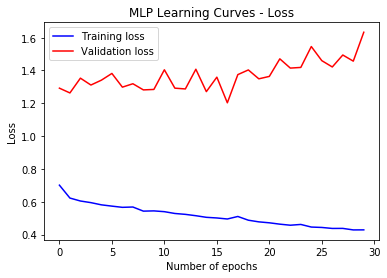

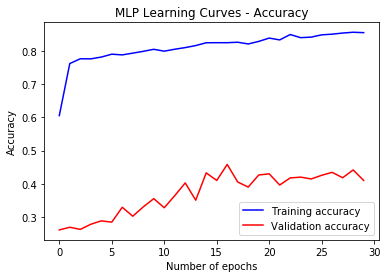

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
num_epochs = 30
plt.title('MLP Learning Curves - Loss')
plt.plot(range(num_epochs), train_losses, color='blue', label='Training loss')
plt.plot(range(num_epochs), valid_losses, color='red', label='Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.title('MLP Learning Curves - Accuracy')
plt.plot(range(num_epochs), train_accuracies, color='blue', label='Training accuracy')
plt.plot(range(num_epochs), valid_accuracies, color='red', label='Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
#!ls drive/My\ Drive
MY_HOME = 'drive/My Drive/' #metadata_articles_dataframe.pkl
!ls drive

'My Drive'


In [0]:
import pandas as pd
import os
import string
data = pd.read_pickle(os.path.join(MY_HOME, "nlp/preprocessed_training_dataframe.pkl"))
# define documents
docs = data['X'][0:12000]



In [0]:
# TODO: find a claim 
# cut off at the first period
# use cosine similarity TFIDF

 russ build a monu to mem the genocid of indig peopl on the be contin outsid the unit stat embassy in russ . ind kil in be genocid mem in moscow ind on of the suggest im for a propos be ind mem in front of the be embassy in moscow the civ chamb of the russ feed rec annount a propos to build a mem commem the genocid of be ind in front of the be embassy in moscow accord to the the civ chamb of the russ feed rec annount a propos to build a mem commem the genocid of be ind in front of the be embassy in moscow accord to the observ the civ chamb of russ feed be comp to yo hous commit on oversight in the yo civ chamb memb valery korovin tell the observ thi monu must becom the sil reproach of the modern be elit which have sign devy from the id principl that wer lay into the find of the be stat although the feed be plan to forward the propos to presid vladimir putin s admin the form of and fund for the mem ar vagu vladimir larin a video blog in moscow and a hand of friend get the ide for the me

In [0]:
import string
str = docs[349]
print(docs[349])

def get_claim_and_body(str):
  """
  separates the body and the claim in a single entry
  """
  summary = []
  for i, char in enumerate(str):
    if char != '.':
      summary.append(char)
      
    elif i > 0.2 * len(str):
      break
    elif char == '.':
      break
  summary = convert(summary)
  summary = summary.translate(str.maketrans('', '', string.punctuation))

  body = str[i:len(str)]
  body = body.translate(str.maketrans('', '', string.punctuation))

  return summary, body

def convert(s): 
  
  # initialization of string to "" 
  str1 = "" 
  
  # using join function join the list s by  
  # separating words by str1 
  return(str1.join(s)) 


def df_to_body_and_claim(df):
  

wayn lapier say an obama-er rul deny gun right to the eld who `` seek help to do their tax . '' bid rev nra hist on background check vic presid joe bid exag when he wax nostalg about the good old day a tim when everybody includ the nra think background check mad sens bid s off say he be refer to the nra s support for background check in the ear 1990s and it stat support for expand background check to includ gun show in on thousand , nin hundr and ninety-nine but vic presid s senty journey rid roughshod ov the fact in on thousand , nin hundr and ninety-one the nra endors legisl cre a nat system of inst background check as an altern to a sevenday wait period contain in the propos brady handgun viol prev act but the technolog do not ex yet a guncontrol advoc say the inst check bil would hav complet gut the brady bil by elimin the wait period in on thousand , nin hundr and ninety-three the brady bil becam law with comprom langu on background check the law requir a fiveday wait period until

# KERAS to try the word embedding method
- [ ] separate them into proper functions
- [ ] try to use the FC and fit_transform of SKLEARN TFIDF

In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
import pandas as pd
import os

data = pd.read_pickle(os.path.join(MY_HOME, "nlp/preprocessed_training_dataframe.pkl"))
# define documents
docs = data['X'][0:12000]
# define class labels
labels = data['label'][0:12000]
print(labels)
# convert labels to onehot
labels = one_hot(labels, 3)
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
# pad documents to a max length of 300 words
max_length = 20
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post', truncating='post')
# load the whole embedding into memory
embeddings_index = dict()
f = open(os.path.join(MY_HOME, 'nlp/glove.6B.50d.txt'))
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 50))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector
# define model
model = Sequential()
e = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=max_length, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(3, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m,precision_m, recall_m])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=100, verbose=0)


id
0        0
1        2
4        1
5        2
6        2
        ..
13211    2
13212    0
13213    1
13214    1
13215    0
Name: label, Length: 12000, dtype: int64
Loaded 400000 word vectors.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 50)            16058550  
_________________________________________________________________
flatten_2 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                32032     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 16,090,681
Trainable params: 32,131
Non-trainable params: 16,058,550
_________________________________________________________________
None


In [0]:
# evaluate the model
# define documents
docs = data['X'][12000:15555]
# define class labels
labels = data['label'][12000:15555]
print(labels)
# convert labels to onehot
labels = one_hot(labels, 3)
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
# pad documents to a max length of 4 words
max_length = 20
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

loss, accuracy, f1_score, precision, recall = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))
print("f1_score, precision, recall", f1_score, precision, recall)

id
13216    1
13217    0
13218    1
13219    2
13220    0
        ..
17137    2
17138    0
17139    0
17140    2
17141    1
Name: label, Length: 3555, dtype: int64
Accuracy: 63.769340
f1_score, precision, recall 0.36785523177199225 0.43943006579886007 0.3181434599156118


In [0]:
from sklearn.metrics import classification_report
y_pred = model.predict_classes(padded_docs, batch_size=64, verbose=1)
# y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(labels, axis=1), y_pred))

3555/3555 [==============================] - 0s 18us/step
              precision    recall  f1-score   support

           0       0.46      0.53      0.49      1638
           1       0.43      0.45      0.44      1530
           2       0.10      0.02      0.03       387

    accuracy                           0.44      3555
   macro avg       0.33      0.33      0.32      3555
weighted avg       0.41      0.44      0.42      3555

